# Notebook Regression - Diamonds price dataset
_[Notebook Regression - Diamonds price dataset](https://www.kaggle.com/datasets/joebeachcapital/diamonds)_

## Valentine Michelet et Baptiste Granier

# Présentation de la base de données 

La base de données "Diamonds" contient plusieurs colonnes décrivant les caractéristiques physiques et qualitatives des diamants, ainsi que leur prix.


- carat : il s’agit du poids du diamant. Un carat correspond à 0,2 gramme. C’est une variable continue directement liée à la taille du diamant, et donc fortement corrélée à son prix.


- clarity (pureté) : elle indique à quel point un diamant est clair, c’est-à-dire le nombre et la visibilité des imperfections internes (inclusions) ou externes. Cette variable ordonnée comporte 8 niveaux, allant de I1 (qualité la plus faible) à IF (Internally Flawless, la meilleure).


- color : elle mesure la teinte du diamant. Les diamants incolores sont les plus précieux, tandis que ceux présentant une légère teinte jaunâtre sont moins recherchés. Cette variable comprend 7 niveaux, notés de D à J (de “incolore” à “légèrement teinté”).


- cut : elle décrit la qualité de la taille du diamant, c’est-à-dire la manière dont il a été taillé à partir de la pierre brute. Une meilleure taille reflète mieux la lumière, rendant le diamant plus brillant. Cette variable ordonnée comprend 5 niveaux : Fair, Good, Very Good, Premium et Ideal.


- x, y, z : ces variables indiquent respectivement la longueur, la largeur et la hauteur du diamant, en millimètres.


- depth et table : deux mesures géométriques liées à la proportion du diamant, influençant sa brillance.


- price : il s’agit du prix du diamant en dollars américains. C’est la variable cible que nous cherchons à prédire.


Dans ce notebook, nous allons essayer de prédire le prix d’un diamant à partir de ses caractéristiques physiques et qualitatives. Nous utiliserons pour cela différents modèles de régression et comparerons leurs performances, tout en explorant la contribution de chaque variable au prix final.

# Partie 1 : Mise en place du Notebook

#### Import des modules

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn
import os as os

#### Importation du jeu de données et affichage de l'entête

In [2]:
data_pd = pd.read_csv("diamonds.csv", na_values = '')
size_dataset = data_pd.shape
# Affichage du nombre lignes et de colonnes
print( "Rows = ", size_dataset[0])
print( "Columns = ", size_dataset[1])
# Réorganisation des colonnes du dataframe pour plus de clareté
columns_reshape = ['Unnamed: 0','carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity','price']
data_pd = data_pd[columns_reshape]
data_pd.head()

Rows =  53940
Columns =  11


,Unnamed: 0,carat,depth,table,x,y,z,cut,color,clarity,price
0,1,0.23,61.5,55.0,3.95,3.98,2.43,Ideal,E,SI2,326
1,2,0.21,59.8,61.0,3.89,3.84,2.31,Premium,E,SI1,326
2,3,0.23,56.9,65.0,4.05,4.07,2.31,Good,E,VS1,327
3,4,0.29,62.4,58.0,4.20,4.23,2.63,Premium,I,VS2,334
4,5,0.31,63.3,58.0,4.34,4.35,2.75,Good,J,SI2,335


#### Affichage de la typologie des colonnes

In [3]:
data_pd.info()
categorical_cols = ['cut', 'color', 'clarity']
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   depth       53940 non-null  float64
 3   table       53940 non-null  float64
 4   x           53940 non-null  float64
 5   y           53940 non-null  float64
 6   z           53940 non-null  float64
 7   cut         53940 non-null  object 
 8   color       53940 non-null  object 
 9   clarity     53940 non-null  object 
 10  price       53940 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


#### Affichage statistique du dataframe

In [4]:
data_pd.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00


#### Affichage d'une instance du dataframe

In [5]:
print(data_pd.values[10])

[11 0.3 64.0 55.0 4.25 4.28 2.73 'Good' 'J' 'SI1' 339]


#### Mise en forme du jeu de données - Transformation en array

In [6]:
data = data_pd.values
y = data[:,-1]

# ID de l'enregistrement
X_id = data[:,0]
# Données
X = data[:,1:-1]

print("X shape :", X.shape)
print("y shape : ", y.shape)

X shape : (53940, 9)
y shape :  (53940,)


# Partie 2 : Affichage des distributions des valeurs du jeu de données

#### Affichage des histogrammes des valeurs numériques

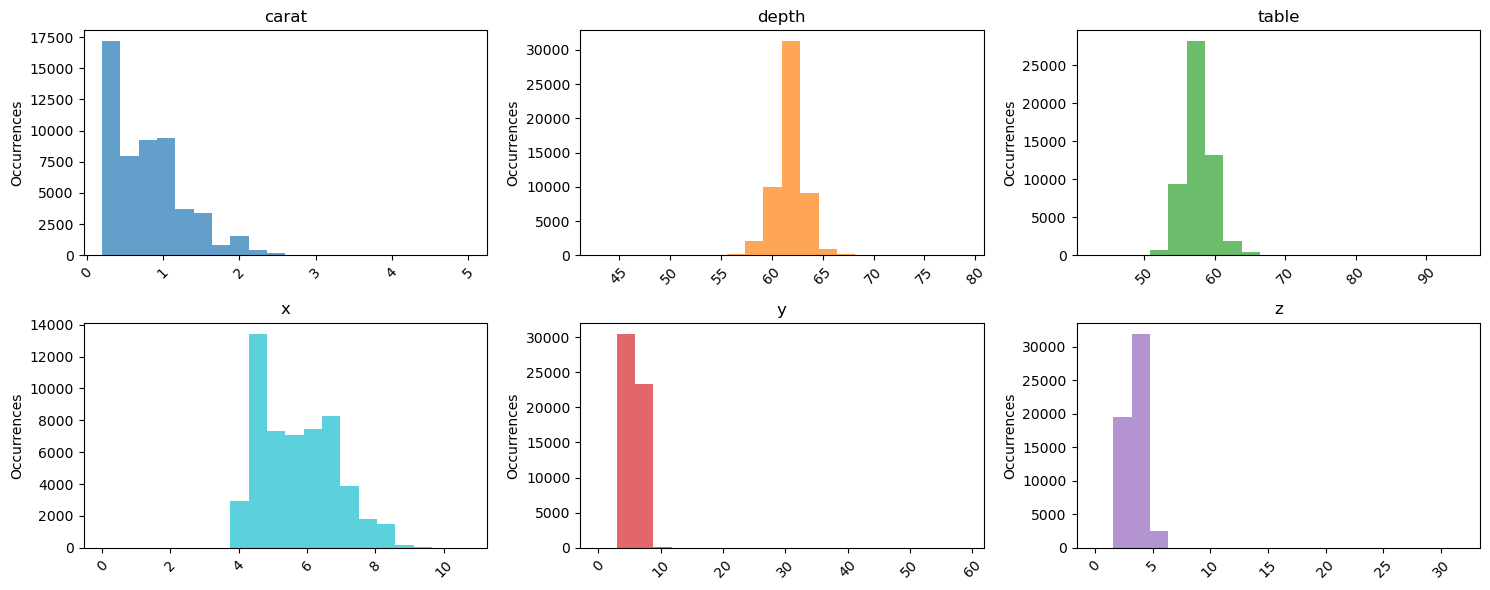

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:cyan','tab:red','tab:purple' ] 
axes = axes.ravel()

for k in range(len(numerical_cols)):
    ax = axes[k]
    color = colors[k]
    array = X[:, k]
    #unique, counts = np.unique(array, return_counts=True)
    unique, counts = np.unique(array, return_counts=True)
    ax.hist(array, bins=20, color  = color, alpha= 0.7)
    #ax.bar(unique, counts, color  = color, alpha= 0.7)
    ax.set_ylabel("Occurrences")
    ax.set_title(numerical_cols[k])
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Notes : 
Pour l'ensemble des descripteurs, nous avons l'impression que l'écart-type des valeurs est faible. Vérifions la présence de points aberrants à l'aide de diagrammes boite à moustache.

#### Affichage des diagrammes boxplots

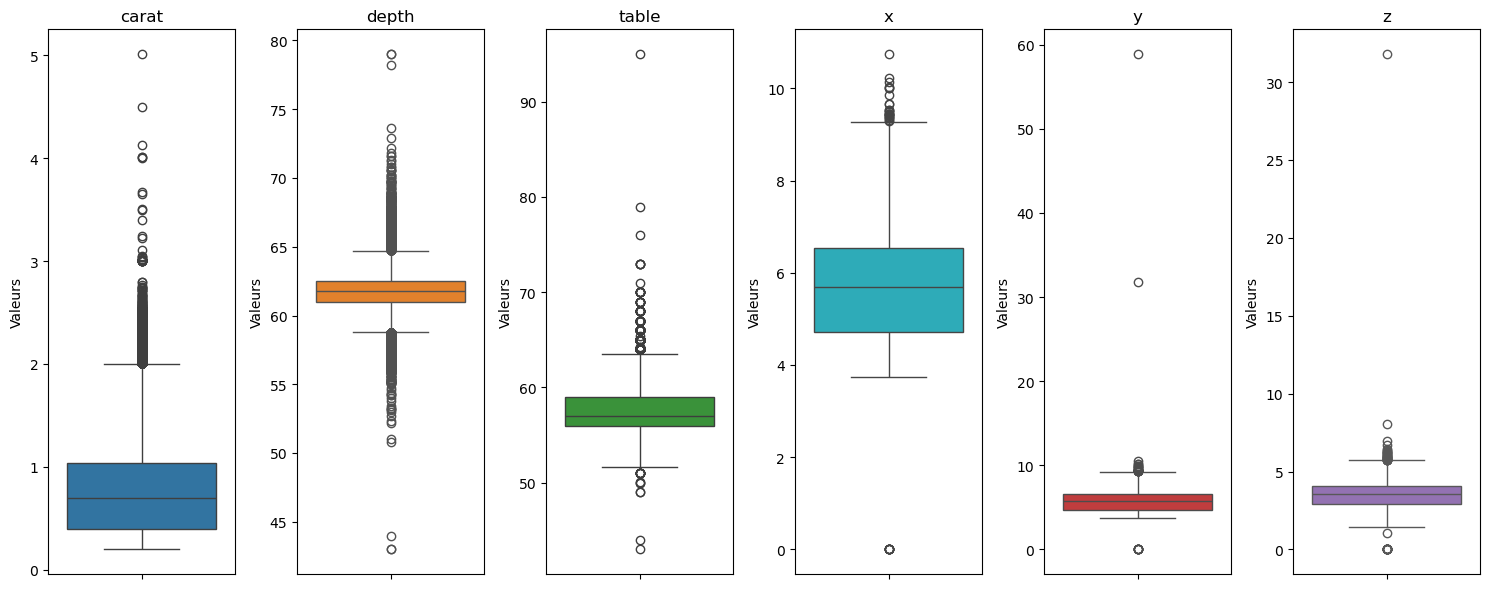

In [8]:
import seaborn as sns

fig, axes = plt.subplots(1, 6, figsize=(15, 6))
axes = axes.ravel()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:cyan', 'tab:red', 'tab:purple']

for k in range(len(numerical_cols)):
    ax = axes[k]
    color = colors[k]
    array = X[:, k]

    sns.boxplot(y=array, ax=ax, color=color)
    ax.set_xlabel("")  # pas pertinent ici
    ax.set_ylabel("Valeurs")
    ax.set_title(columns_reshape[k+1])
    ax.tick_params(axis='x', labelbottom=False)  # Pas de labels x

plt.tight_layout()
plt.show()


### Notes

La plupart des descripteurs ont un écart type relativement faible mais nous avons une forte présence de points aberrants, qui n'étaient pas visibles sur les histogrammes précédents.

#### Affichage des histogrammes des descripteurs catégoriels

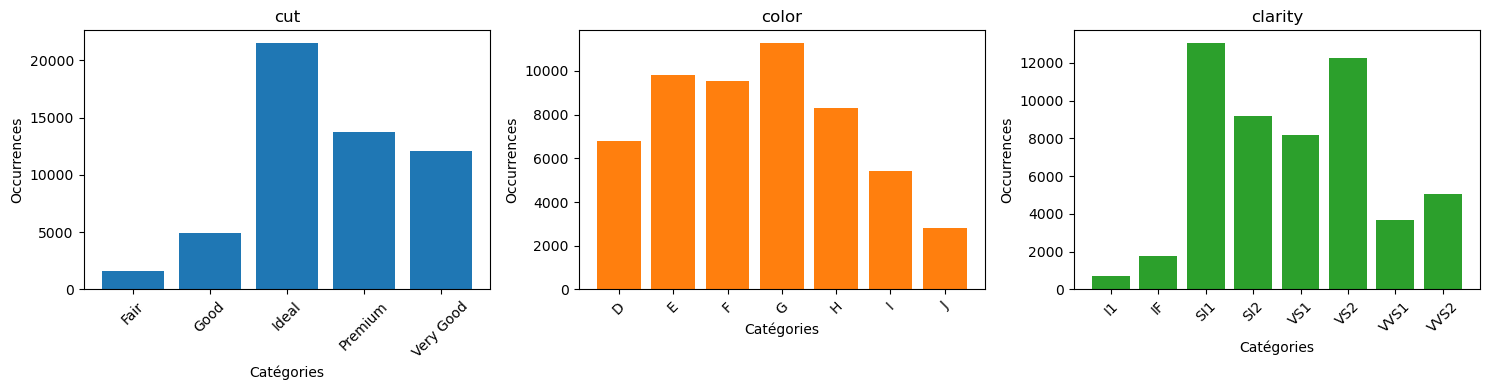

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
colors = ['tab:blue', 'tab:orange', 'tab:green'] 

for k in range(len(categorical_cols)):
    ax = axes[k]
    color = colors[k]
    array = X[:, k+6]
    unique, counts = np.unique(array, return_counts=True)

    ax.bar(unique, counts, color=color)
    ax.set_xlabel("Catégories")
    ax.set_ylabel("Occurrences")
    ax.set_title(categorical_cols[k])
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Note : 

Le jeu de données est relativement équilibré pour ces descripteurs.

#### Affichage de l'histogramme des valeurs de prix

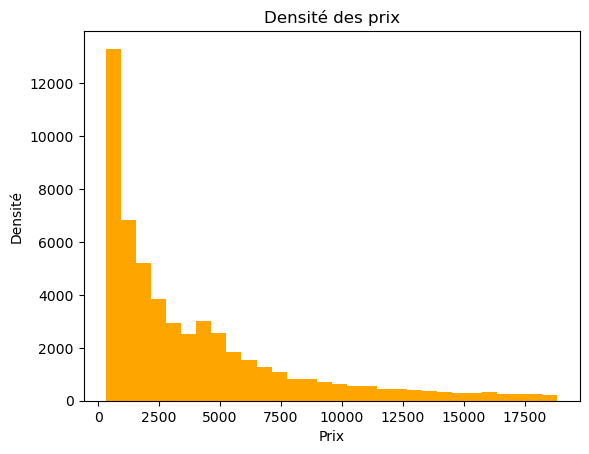

In [10]:

unique, counts = np.unique(y, return_counts=True)
#plt.bar(unique, counts)
plt.hist(y, bins = 30, color="orange")
plt.xlabel("Prix")
plt.ylabel("Densité")
plt.title("Densité des prix")

plt.show()



## Note :

La courbe ressemble à une fonction expontielle décroissante (e^-x), ce qui est cohérent avec l'analyse terrain : plus les diamants sont rares, plus ils sont chers.

# Partie 3 : Encodage des variables catégorielles

#### Label Encoding

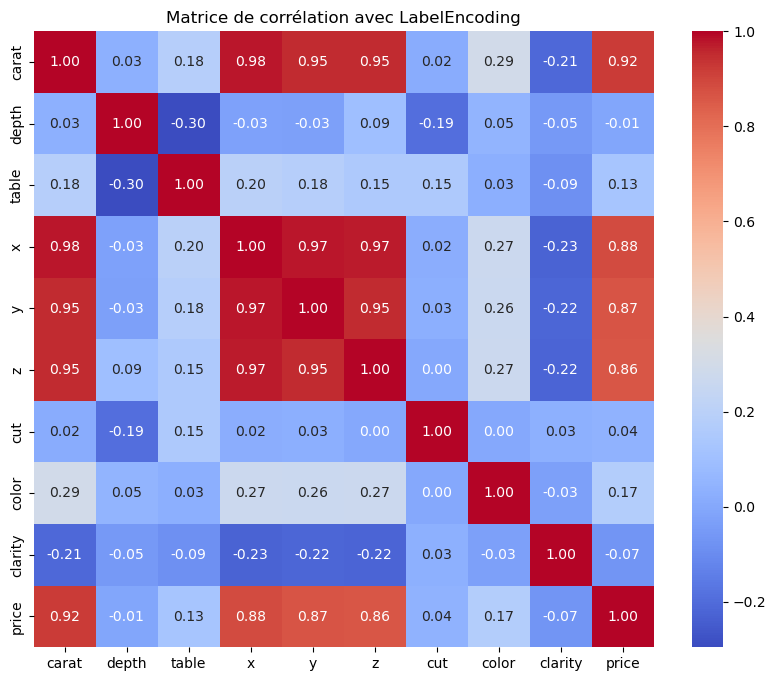

Corrélation avec le prix:
price      1.000000
carat      0.921591
x          0.884435
y          0.865421
z          0.861249
color      0.172511
table      0.127134
cut        0.039860
depth     -0.010647
clarity   -0.071535
Name: price, dtype: float64


In [11]:
from sklearn.preprocessing import LabelEncoder

# Copier le dataset pour l'encoder
data_encoded = data_pd.copy()
label_encoders = {}

# Encoder les colonnes catégorielles
for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_pd[col])
    label_encoders[col] = le

# Colonnes à inclure dans la corrélation
cols_for_corr = numerical_cols + categorical_cols + ['price']

# Calculer la matrice de corrélation
corr_matrix = data_encoded[cols_for_corr].corr()

# Afficher la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation avec LabelEncoding")
plt.show()

# Corrélation avec le prix
print("Corrélation avec le prix:")
print(corr_matrix['price'].sort_values(ascending=False))

#### Notes : 
- Le prix est fortement corrélé positivement avec le poids, x, y, z. Cela est cohérent car x*y*z donne le volume du diamant et peut être rapproché du poids du diamant par extension, et que plus un diamant est lourd / grand, plus il est cher.

- La couleur a une légère influence sur le prix, avec globalement un objetif de pureté du diamant.
- La coupe, la profondeur et la clareté n'ont pas d'influence dans cette matrice, ce qui reste étrange d'après la règle des 4C pour les diamants.

_NB : Quatre critères, les 4 C, permettent de définir la valeur d'un diamant: la taille (Cut), la pureté (Clarity), la teinte (Colour) et le poids (Carat)._

Essayons d'améliorer les performances avec du OneHotEncoding pour se passer de l'ordre factice du Label Encoding.

#### OneHotEncoding

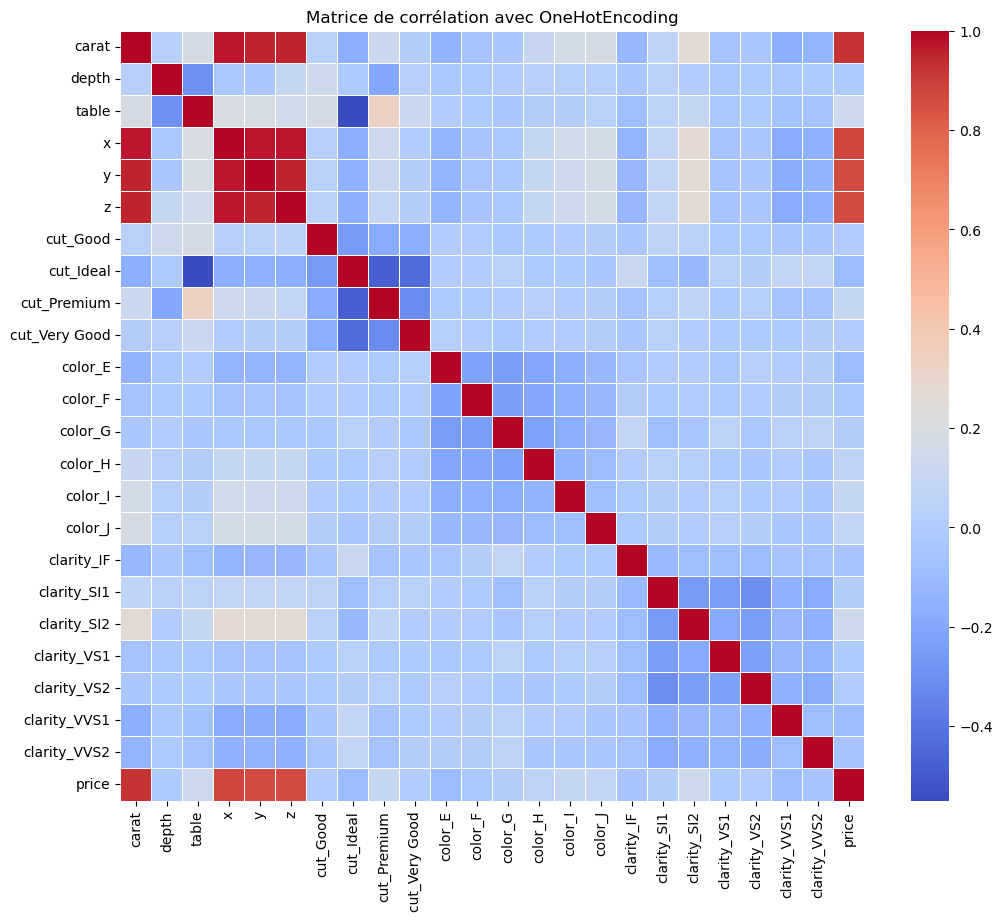

Corrélation avec le prix :
price            1.000000
carat            0.921591
x                0.884435
y                0.865421
z                0.861249
clarity_SI2      0.128420
table            0.127134
color_I          0.097125
cut_Premium      0.095706
color_J          0.081710
color_H          0.059223
clarity_SI1      0.008957
color_G          0.008556
cut_Very Good    0.006593
cut_Good        -0.000312
clarity_VS2     -0.001062
clarity_VS1     -0.009886
depth           -0.010647
color_F         -0.024161
clarity_IF      -0.049596
clarity_VVS2    -0.052381
clarity_VVS1    -0.095266
cut_Ideal       -0.097175
color_E         -0.101089
Name: price, dtype: float64


In [12]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder
enc = OneHotEncoder(sparse_output=False, drop='first')  
X_cat = enc.fit_transform(data_pd[categorical_cols])

# Générer les noms de colonnes pour les variables encodées
column_names = []
for i, cat in enumerate(enc.categories_):
    column_names.extend([f"{categorical_cols[i]}_{c}" for c in cat[1:]])

# Créer un DataFrame pour les colonnes encodées
X_cat_df = pd.DataFrame(X_cat, columns=column_names, index=data_pd.index)

# Combiner les colonnes numériques, encodées et le prix
data_final = pd.concat([data_pd[numerical_cols], X_cat_df, data_pd['price']], axis=1)

# Calculer la matrice de corrélation
corr_matrix = data_final.corr()

# Afficher la heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation avec OneHotEncoding")
plt.show()

# Corrélation avec le prix
print("Corrélation avec le prix :")
print(corr_matrix['price'].sort_values(ascending=False))


## Note : 
Nous remarquons une plus grande disparité de la matrice de colinéarité ce qui est sûrement une bonne voie pour la suite grâce au OneHotEncoding.

# Partie 4 : Prédiction du prix à l'aide des modèles de ML

## 1. Traitement préalable des données

#### Séparation de l'ensemble de test et d'apprentissage

In [13]:
from sklearn.model_selection import train_test_split

# DataFrame final pour X : colonnes numériques + colonnes catégorielles encodées
X_hot = np.concatenate([data_pd[numerical_cols].values, X_cat], axis=1)

# Target continue : prix
y = data_pd['price'].values

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_hot, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)


X_train shape: (43152, 23)
X_test shape : (10788, 23)


#### Normalisation et centrage des données

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)        
X_train_scaled = scaler.transform(X_train)  
X_test_scaled  = scaler.transform(X_test) 

#### Définition de la fonction d'évaluation des modèles

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluation_regression(model, X_train, X_test, y_train, y_test, model_name = ""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print("____________")
    print(f'Essai sur échantillon de test {model_name}')
    print("y_pred min/max :", round(y_pred.min(),3), round(y_pred.max(),3))
    print(f"MAE: {mae:.3f} | RMSE: {rmse:.3f} | R²: {r2:.3f}")
    return [model_name, mae, rmse, r2]

## 2. Evaluation des différents modèles

#### Tests sur des modèles naïfs : moyenne et aléatoire

In [16]:
# Baseline_moyenne : renvoie la moyenne des prix observés dans y_train

df_exp = pd.DataFrame(columns=["Model Name", "MAE", "RMSE", "R2"])

y_baseline = np.full_like(y_test, y_train.mean())

mae_b = mean_absolute_error(y_test, y_baseline)
rmse_b = np.sqrt(mean_squared_error(y_test, y_baseline))
r2_b = r2_score(y_test, y_baseline)

print(f"Baseline moyenne")
print(f"MAE: {mae_b:.3f} | RMSE: {rmse_b:.3f} | R²: {r2_b:.3f}")

df_exp.loc[len(df_exp)] = ["Baseline_Moyenne", mae_b, rmse_b, r2_b]

# Baseline_random : renvoie un tirage aléatoire entre min et max de y_train
np.random.seed(42)  
y_random = np.random.uniform(low=y_train.min(), high=y_train.max(), size=y_test.shape)

mae_rand = mean_absolute_error(y_test, y_random)
rmse_rand = np.sqrt(mean_squared_error(y_test, y_random))
r2_rand = r2_score(y_test, y_random)

print("Baseline tirage aléatoire")
print(f"MAE: {mae_rand:.3f} | RMSE: {rmse_rand:.3f} | R²: {r2_rand:.3f}")

df_exp.loc[len(df_exp)] = ["Baseline_Random", mae_rand, rmse_rand, r2_rand]

Baseline moyenne
MAE: 3020.369 | RMSE: 3987.218 | R²: -0.000
Baseline tirage aléatoire
MAE: 7177.186 | RMSE: 8694.579 | R²: -3.755


#### Tests sur les modèles
- SVC Linéaire
- Random Forest Regrossor
- XGBoost

In [17]:
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# df_exp = pd.DataFrame(columns=["Model Name", "MAE", "RMSE", "R2"])
print("y_test min/max :", y_test.min(), y_test.max())

# LinearSVR
model_svr = LinearSVR(max_iter=5000, random_state=75)
df_exp.loc[len(df_exp)] = evaluation_regression(model_svr, X_train_scaled, X_test_scaled, y_train, y_test, "LinearSVR") 

# RandomForestRegressor
model_rfr = RandomForestRegressor()
df_exp.loc[len(df_exp)] = evaluation_regression(model_rfr, X_train_scaled, X_test_scaled, y_train, y_test, "RandomForestRegressor")

# XGBRegressor
model_xgb = XGBRegressor()
df_exp.loc[len(df_exp)] = evaluation_regression(model_xgb, X_train_scaled, X_test_scaled, y_train, y_test, "XGBRegressor")



y_test min/max : 335 18823
____________
Essai sur échantillon de test LinearSVR
y_pred min/max : -1886.075 25050.493
MAE: 771.330 | RMSE: 1460.762 | R²: 0.866
____________
Essai sur échantillon de test RandomForestRegressor
y_pred min/max : 370.78 18124.52
MAE: 294.480 | RMSE: 631.223 | R²: 0.975
____________
Essai sur échantillon de test XGBRegressor
y_pred min/max : 33.555 18473.668
MAE: 297.722 | RMSE: 579.610 | R²: 0.979


In [18]:
df_exp

,Model Name,MAE,RMSE,R2
0,Baseline_Moyenne,3020.368743,3987.218089,-0.000068
1,Baseline_Random,7177.185811,8694.578862,-3.755397
2,LinearSVR,771.330384,1460.762169,0.865770
3,RandomForestRegressor,294.480373,631.223464,0.974936
4,XGBRegressor,297.722198,579.610025,0.978867


#### Analyse des résultats : 

Les modèles choisis sont meilleurs que des modèles naïfs, ce qui est encourageant pour la suite. De plus, nous avons le Random Forest Regressor (RFR) et XGBoost (XGB) qui ont des bonnes performances, meilleures que le SVR linéaire(LinearSVR). Leur R2 est très proche : 0.975 pour RFR et 0.979 pour XGB. Toutefois, XGboost peut prédire des valeurs abérrantes, comme l'indique la valeur minimale calculée par le modèle ci-dessus. Par la suite, nous allons essayer d'améliorer les performances des modèles RFR et XGB.

En effety, malgrè un R2 proche de 1, les MAE et les RMSE restent élevés.

Par exemple, pour le modèle Random Forest Regressor (RFR), cela signifie que les erreurs de prédiction sur le prix des diamants sont en moyenne d’environ 294 dollars (MAE). Cependant, certaines estimations présentent des écarts plus importants, atteignant en moyenne 631 dollars lorsqu’on prend en compte la pénalisation plus forte des grandes erreurs (RMSE).

Essayons de minimiser la MAE et le RMSE des modèles RFR et XGB.

Afin de réduire ces valeurs, nous avons d'abord essayé de séparer le jeu de données en deux parties pour avoir un jeu de données plus équilibré: 
- Les diamants dont le prix est inférieur à 6000 dollars
- Les diamants dont le prix est supérieur à 6000 dolars

### Séparation des variables du dataframe

In [19]:
val_sep = 6000

X_inf = X_hot[np.where(y<val_sep)[0]]
y_inf = y[np.where(y<val_sep)[0]]

X_sup = X_hot[np.where(y>val_sep)[0]]
y_sup = y[np.where(y>val_sep)[0]]


print(y_inf.shape, X_inf.shape)
print(y_sup.shape, X_sup.shape)

(42387,) (42387, 23)
(11551,) (11551, 23)


### Création des ensembles de tests et d'apprentissages

In [20]:
X_inf_train, X_inf_test, y_inf_train, y_inf_test = train_test_split(X_inf, y_inf, random_state=80, train_size=0.8)
X_sup_train, X_sup_test, y_sup_train, y_sup_test = train_test_split(X_sup, y_sup, random_state=80, train_size=0.8)

### Evaluation des différents modèles

In [21]:
model_rfr_2 = RandomForestRegressor(random_state=80)
model_rfr_3 = RandomForestRegressor(random_state=80)
model_xgb_2 = XGBRegressor()
model_xgb_3 = XGBRegressor()


df_exp.loc[len(df_exp)] = evaluation_regression(model_rfr_2, X_inf_train, X_inf_test, y_inf_train, y_inf_test, "RFR inf")
df_exp.loc[len(df_exp)] = evaluation_regression(model_rfr_3, X_sup_train, X_sup_test, y_sup_train, y_sup_test, "RFR_sup")
df_exp.loc[len(df_exp)] = evaluation_regression(model_xgb_2, X_inf_train, X_inf_test, y_inf_train, y_inf_test, "Xgb inf")
df_exp.loc[len(df_exp)] = evaluation_regression(model_xgb_3, X_sup_train, X_sup_test, y_sup_train, y_sup_test, "Xgb sup")



____________
Essai sur échantillon de test RFR inf
y_pred min/max : 366.29 5848.21
MAE: 144.471 | RMSE: 247.676 | R²: 0.976
____________
Essai sur échantillon de test RFR_sup
y_pred min/max : 6137.55 18108.39
MAE: 770.232 | RMSE: 1190.947 | R²: 0.888
____________
Essai sur échantillon de test Xgb inf
y_pred min/max : 289.835 6229.295
MAE: 148.687 | RMSE: 243.146 | R²: 0.977
____________
Essai sur échantillon de test Xgb sup
y_pred min/max : 4308.935 19095.076
MAE: 767.391 | RMSE: 1139.850 | R²: 0.897


In [22]:
df_exp

,Model Name,MAE,RMSE,R2
0,Baseline_Moyenne,3020.368743,3987.218089,-0.000068
1,Baseline_Random,7177.185811,8694.578862,-3.755397
2,LinearSVR,771.330384,1460.762169,0.865770
3,RandomForestRegressor,294.480373,631.223464,0.974936
4,XGBRegressor,297.722198,579.610025,0.978867
5,RFR inf,144.471480,247.676145,0.975902
6,RFR_sup,770.232466,1190.946954,0.887700
7,Xgb inf,148.686905,243.146127,0.976776
8,Xgb sup,767.391052,1139.849551,0.897130


#### Analyse des résultats :
A première vues, nous avons l'impression que les résultats (RMSE, MAE, R2) se sont améliorés sur les valeurs <6000 $, tandis qu'ils se sont dégradés pour la partie >6000 $$. En réalité, les résultats précédemment obtenues ne sont qu'une pondération des résultats ci-dessus. Nous n'avons donc pas améliorer la performance de nos modèles ici.

Essayons d'effectuer un ordinal enconding, qui pourrait refléter de la relation d’ordre existant entre les variables catégorielles du jeu de données. En effet, pour les variables cut, color et clarity, les modalités suivent une hiérarchie allant des moins bonnes aux meilleures qualités.

## Redéfinition des variables catégorielles à l'aide d'un ordinal encoding

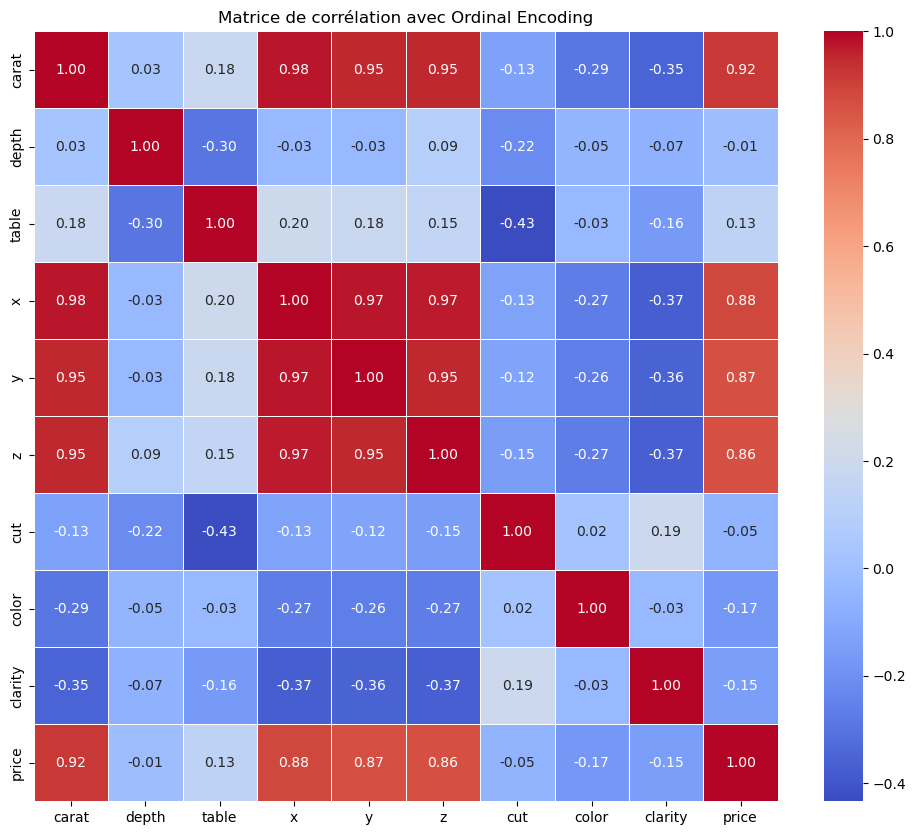

Corrélation avec le prix (Ordinal Encoding) :
price      1.000000
carat      0.921591
x          0.884435
y          0.865421
z          0.861249
table      0.127134
depth     -0.010647
cut       -0.053491
clarity   -0.146800
color     -0.172511
Name: price, dtype: float64


In [23]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ces ordres correspondent à la logique du dataset diamonds
categories_order = [
    ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],   # cut
    ['J', 'I', 'H', 'G', 'F', 'E', 'D'],                # color
    ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']  # clarity
]

# Encodage ordinal
enc = OrdinalEncoder(categories=categories_order)
X_cat = enc.fit_transform(data_pd[categorical_cols])

# Créer un DataFrame pour les colonnes encodées
X_cat_df = pd.DataFrame(X_cat, columns=categorical_cols, index=data_pd.index)

# Combiner les colonnes numériques, encodées et la cible 'price'
data_final = pd.concat([data_pd[numerical_cols], X_cat_df, data_pd['price']], axis=1)
X_ord = data_final.values

corr_matrix = data_final.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation avec Ordinal Encoding")
plt.show()

# Corrélation individuelle avec la variable cible
print("Corrélation avec le prix (Ordinal Encoding) :")
print(corr_matrix['price'].sort_values(ascending=False))


#### Note:
La matrice de corrélation diffère légèrement de celle issue du LabelEncoding.

### Création de l'ensemble de test et d'apprentissage pour les données ordonnées

In [24]:
X_ord_train, X_ord_test, y_ord_train, y_ord_test = train_test_split(X_ord, y, random_state=80)

### Tests des modèles ensemblistes sur ces ensembles ordonnées

In [25]:

print("y_test min/max :", y_test.min(), y_test.max())

# RandomForestRegressor
model_rfr_4 = RandomForestRegressor(random_state=80)
df_exp.loc[len(df_exp)] = evaluation_regression(model_rfr_4, X_ord_train, X_ord_test, y_ord_train, y_ord_test, "RandomForestRegressor_Ord")

# XGBRegressor
model_xgb_4 = XGBRegressor()
df_exp.loc[len(df_exp)] = evaluation_regression(model_xgb_4, X_ord_train, X_ord_test, y_ord_train, y_ord_test, "XGBRegressor_Ord")



y_test min/max : 335 18823
____________
Essai sur échantillon de test RandomForestRegressor_Ord
y_pred min/max : 332.04 18803.14
MAE: 0.289 | RMSE: 0.763 | R²: 1.000
____________
Essai sur échantillon de test XGBRegressor_Ord
y_pred min/max : 354.615 18805.795
MAE: 19.532 | RMSE: 41.824 | R²: 1.000


In [26]:
df_exp

,Model Name,MAE,RMSE,R2
0,Baseline_Moyenne,3020.368743,3987.218089,-0.000068
1,Baseline_Random,7177.185811,8694.578862,-3.755397
2,LinearSVR,771.330384,1460.762169,0.865770
3,RandomForestRegressor,294.480373,631.223464,0.974936
4,XGBRegressor,297.722198,579.610025,0.978867
5,RFR inf,144.471480,247.676145,0.975902
6,RFR_sup,770.232466,1190.946954,0.887700
7,Xgb inf,148.686905,243.146127,0.976776
8,Xgb sup,767.391052,1139.849551,0.897130
9,RandomForestRegressor_Ord,0.288521,0.763321,1.000000


#### Analyse des résultats :
Avec l'ordinal encoding, nous avons réussi à grandement dimunuer la MAE et le RMSE et à obtenir des R2 égaux à 1. Le meilleur modèle est le RandomForestRegressor, nous avons réussi a obtenir:
-  MAE: 0.289 | RMSE: 0.763 | R²: 1.000
- Des prédictions de prix minimum et maximum très proches des vraies valeurs 

# Conclusion : 

Grâce à une bonne compréhension des descripteurs du jeu de données, nous avons été capable de prédire avec une erreur extrêment faible sur le RFR les prix des diamants de ce jeu de données. 
Une piste d'amélioration pourrait être d'utiliser Optuna afin de tester la validité des hyper-paramètres sélectionnés, mais aux vues des performances, nous n'avons pas juger nécessaire cette étape. 